## Heart Disease Prediction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Read the Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

#### find the missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

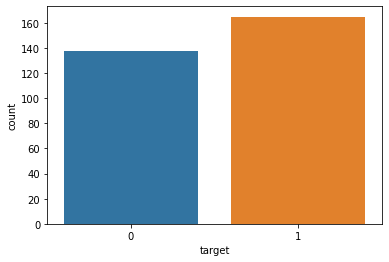

In [10]:
sns.countplot(x = 'target' , data=df)

In [11]:
x=df.drop(columns='target',axis=1)
y=df['target']


In [12]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


#### plot histograms for each column

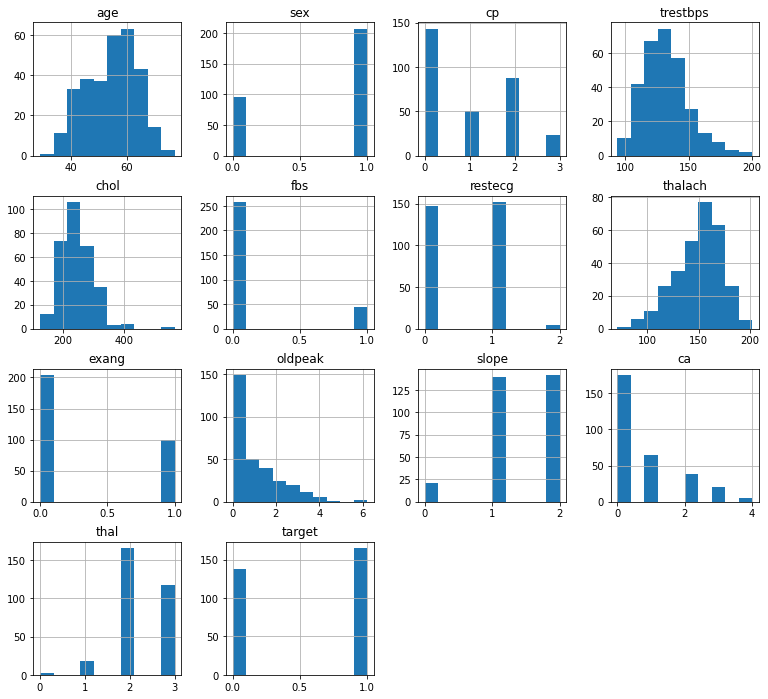

In [14]:
df.hist(figsize=(13,12))
plt.show()

### splitting dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


## model training

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_preds_lr=lr.predict(x_test)
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [19]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.8512396694214877


In [20]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [21]:
print('Accuracy on test data: ',test_data_accuracy)

Accuracy on test data:  0.819672131147541


In [22]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3


In [23]:
y_test.head()

255    0
72     1
83     1
268    0
92     1
Name: target, dtype: int64

### Correlation Matrix

<AxesSubplot:>

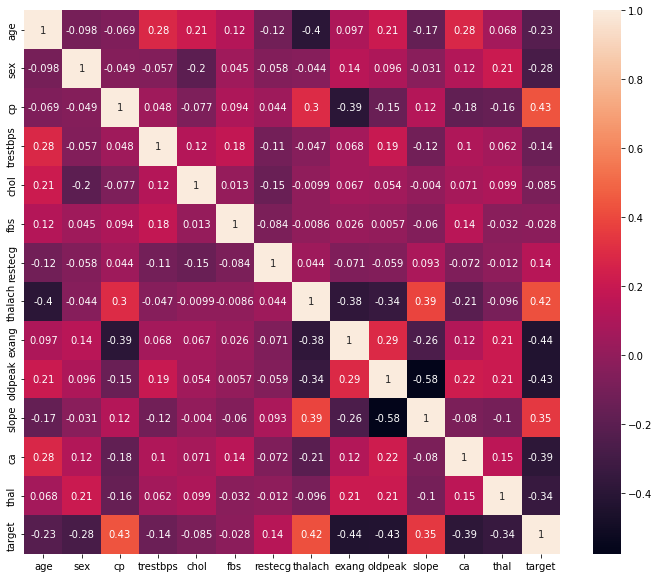

In [24]:
corr_mat = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat , annot=True)

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  5],
       [ 6, 27]], dtype=int64)

### Accuracy Score

In [26]:
#linear regression
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
print('Accuracy for Linear Regresssion is',regr.score(x_test,y_test)*100)

Accuracy for Linear Regresssion is 41.859080344448664


In [27]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
print("Accuracy for Random Forest is", model.score(x_test, y_test)*100)

Accuracy for Random Forest is 78.68852459016394


In [28]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy for Decision Tree is", model2.score(x_test, y_test)*100)

Accuracy for Decision Tree is 78.68852459016394


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_preds_lr=lr.predict(x_test)
model=LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 81.9672131147541


In [30]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train , y_train)
print("Accuracy is", classifier.score(x_test, y_test)*100)

Accuracy is 62.295081967213115


#### Input Details of patient for Prediction

In [ ]:
def prediction_calculator(n):
  for i in range(n):
      print("\nENTER THE DETAILS FOR PERSON : ",(i+1))
      age_ip=int(input("\nEnter Age: "))
      sex_ip=int(input("\nIf Female Enter 0\nIf Male Enter 1 : "))
      print("\nValue 0: asymptomatic\nValue 1: atypical angina\nValue 2: non-anginal pain")
      cp_ip=int(input("\nEnter Chest Pain value (0/1/2) : "))
      trestbps_ip=int(input("\nEnter tResting Blood Pressure: "))
      chol_ip=int(input("\nEnter Cholestrol Value: "))
      print("\nThe person’s fasting blood sugar if greater than 120mg Enter 1 or 0 ")
      fbs_ip=int(input("\nEnter Fasting Blood Pressure value (0/1): "))
      print("\nresting electrocardiographic results\nValue 0: showing probable or definit")
      restecg_ip=int(input("\nEnter Resting Electrocardiographic value (0/1/2) : "))
      thalach_ip=int(input("\nEnter Max heart rate achieved : "))
      exang_ip=int(input("\nEnter Exercise induced angina : "))
      oldpeak_ip=float(input("\nEnter ST depression induced value : "))
      print("\nPerson's slope value\n0: downsloping\n1: flat\n2: upsloping")
      slope_ip=int(input("\nEnter slope value (0/1/2) : "))
      ca_ip=int(input("\nEnter number of major vessels (0-3) : "))
      print("\nThalassemia:\nValue 0: NULL\nValue 1: fixed defect\nValue 2: normal blood ")
      thal_ip=int(input("\nEnter Thalassemia Value: "))
 
      c=np.array([age_ip, sex_ip, cp_ip, trestbps_ip, chol_ip, fbs_ip, restecg_ip, thalach_ip,exang_ip, oldpeak_ip, slope_ip, ca_ip, thal_ip])
      c_rs=c.reshape(1,-1)
      pred = lr.predict(c_rs)
      if pred==1:
          print("\n\nPerson Has an Heart Disease\nPlease Consult the Doctor!!")
      else:
          print("\n\nThe Person No Heart Disease :)")
 
no_of_people=int(input("ENTER NUMBER OF PEOPLE : "))
prediction_calculator(no_of_people)

ENTER NUMBER OF PEOPLE : 2

ENTER THE DETAILS FOR PERSON :  1

Enter Age: 25

If Female Enter 0
If Male Enter 1 : 1

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain

Enter Chest Pain value (0/1/2) : 0

Enter tResting Blood Pressure: 125

Enter Cholestrol Value: 212

The person’s fasting blood sugar if greater than 120mg Enter 1 or 0 

Enter Fasting Blood Pressure value (0/1): 0

resting electrocardiographic results
Value 0: showing probable or definit

Enter Resting Electrocardiographic value (0/1/2) : 0

Enter Max heart rate achieved : 135
